In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot: xlabel='quality', ylabel='count'>

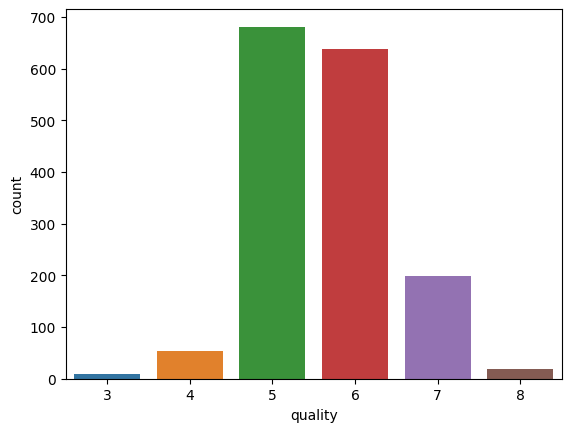

In [8]:
# quality distribution
sns.countplot(x='quality',data=df)


In [9]:
# if >5 then 1 else 0
df["quality"]=[1 if x>5 else 0 for x in df.quality]

In [10]:
x=df.drop(["quality"],axis=1)
y=df.quality

In [11]:
y.unique()

array([0, 1], dtype=int64)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
sc=StandardScaler()

In [14]:
# fit_transform for train data
x_train=sc.fit_transform(x_train)

In [15]:
def get_models():
    models = {}
    models['Logistic Regression'] = LogisticRegression(random_state=42)
    models['Random Forest'] = RandomForestClassifier()
    models['SVM'] = SVC()
    return models


In [16]:
def train_model(models, x_train, y_train):
    # Train the models and store in a dictionary
    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model
    return trained_models

In [17]:
# get all models accuracy
def get_accuracy(models, x_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} : {round(accuracy*100, 2)}%')


In [18]:
models = get_models()

In [19]:
trained_model=train_model(models, x_train, y_train)

In [20]:
x_test=sc.transform(x_test)

In [21]:
accuracy = get_accuracy(trained_model, x_test, y_test)

Logistic Regression : 74.06%
Random Forest : 78.44%
SVM : 77.19%


In [22]:
# get evaluation metrics of each model
# import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
def get_metrics(models, x_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(x_test)
        print(f'{name} :')
        print(classification_report(y_test, y_pred))
        print('')

In [23]:
metrics = get_metrics(trained_model, x_test, y_test)

Logistic Regression :
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320


Random Forest :
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       141
           1       0.81      0.80      0.81       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320


SVM :
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77     

In [24]:
# # neural network tf
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# model=keras.Sequential([
#     layers.Dense(12,activation="relu",input_shape=[11]),
#     layers.Dense(8,activation="relu"),
#     layers.Dense(1,activation="sigmoid")
# ])

# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# # early stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping=EarlyStopping(monitor="val_loss",patience=50,verbose=1)
# # test and train
# model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=250)



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# export model as nn
model.save("nn_model.h5")

